In [14]:
import xgboost as xgb
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
from pylab import rcParams

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.cross_validation import cross_val_score as cvs
from sklearn.model_selection import cross_val_predict as cross_val_predict
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.ensemble import IsolationForest

rcParams['figure.figsize'] = 15, 10
%config InlineBackend.figure_format = 'retina'  # более качественное отображение графиков

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # вывод всех запрошенных переменных ячейки

In [15]:
rcParams['figure.figsize'] = 280, 5

In [70]:
train = np.load("clusters//train_clusters.npy")

In [71]:
W = 100

In [64]:
p = np.chararray.tostring(train)

In [92]:
ans = pd.DataFrame(index=range(48))
ans[0] = 0

for test_i in range(48):
    original_test = pd.read_csv('./test/' + str(test_i // 10) + str(test_i % 10) + '_test.csv', index_col="Time").dropna()
    
    test = np.load("clusters//test" + str(test_i) + "_clusters.npy")
    t = np.chararray.tostring(test)
    
    candidates = []
    for i in range(W, len(test)):
        j = p.find(t[(i - W) * 4:i * 4])
        if j == -1:
            candidates.append(original_test.index[i])
            
            if len(candidates) >= W and candidates[-1] - candidates[-W] < 10000:
                ans[0][test_i] = original_test.index[i]
                print(test_i, ") ", i, ans[0][test_i])
                break
                
    if ans[0][test_i] == 0:
        print("anomal!")
        ans[0][test_i] = candidates[0]

0 )  43090 42274
1 )  34774 34108
2 )  141750 138468
3 )  128667 125805
4 )  40165 39335
5 )  65327 63899
6 )  54846 53744
7 )  98585 96555
anomal!
9 )  54393 53347
10 )  118412 115814
11 )  89961 88021
12 )  63161 61917
13 )  137376 134360
14 )  77995 76263
15 )  105426 103024
16 )  118685 116023
17 )  31446 30884
18 )  65987 64781
19 )  112707 110318
anomal!
21 )  33317 32729
22 )  52894 51814
23 )  49177 48147
24 )  59964 58706
25 )  47269 46219
26 )  89698 87668
27 )  126479 123699
28 )  103234 101110
29 )  84621 82789
30 )  25966 25456
31 )  51851 50813
32 )  119318 116748
33 )  55932 54752
anomal!
35 )  101978 99640
anomal!
37 )  120423 117733
38 )  81470 79650
39 )  42827 41913
40 )  25070 24572
41 )  17445 17079
42 )  136781 133625
43 )  62779 61467
44 )  89923 88155
45 )  107066 104670
anomal!
47 )  72193 70565


In [93]:
ans.to_csv("10. better clusterization.csv", header=None)

In [90]:
for test_i in range(0, 1):
    original_test = pd.read_csv('./test/' + str(test_i // 10) + str(test_i % 10) + '_test.csv', index_col="Time").dropna()
    
    test = np.load("clusters//test" + str(test_i) + "_clusters.npy")
    t = np.chararray.tostring(test)
    
    answer = np.zeros((len(test) - W))
    for i in range(W, len(test)):
        j = p.find(t[(i - W) * 4:i * 4])
        if j == -1:
            print(i, original_test.index[i])
        else:

            k = j
            while j < len(p) and (i - W) * 4 + j - k < len(t) and p[j] == t[(i - W) * 4 + j - k]:
                j += 1
            answer[i - W] = j - k

        if i % 10000 == 0:
            print('-------------------------------------------------', i, "---------------------------")

42096.0
42097.0
42098.0
42099.0
42100.0
42101.0
42102.0
42103.0
42104.0
42105.0
42106.0
42107.0
42108.0
42109.0
42110.0
42111.0
42112.0
42113.0
42114.0
42115.0
42116.0
42117.0
42118.0
42119.0
42120.0
42121.0
42122.0
42123.0
42124.0
42125.0
42126.0
42127.0
42128.0
42129.0
42130.0
42131.0
42132.0
42133.0
42134.0


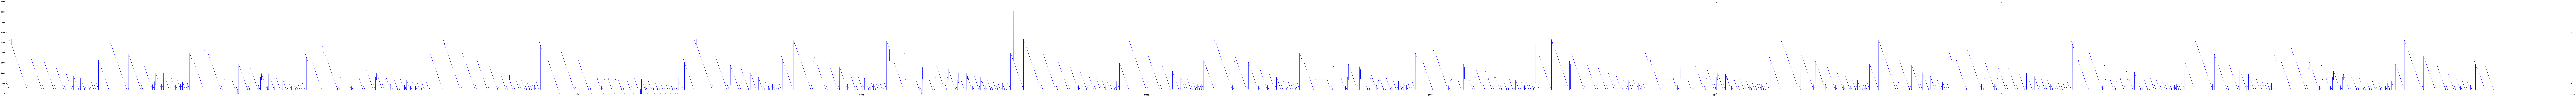

In [88]:
rcParams['figure.figsize'] = 280, 10
plt.plot(answer)    #тест4

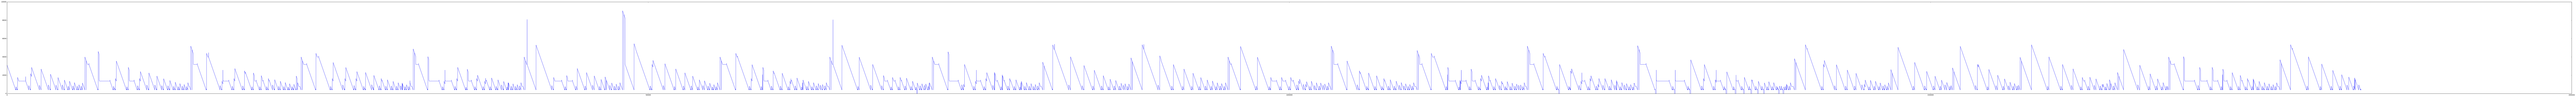

In [79]:
rcParams['figure.figsize'] = 280, 10
plt.plot(answer)    #тест3

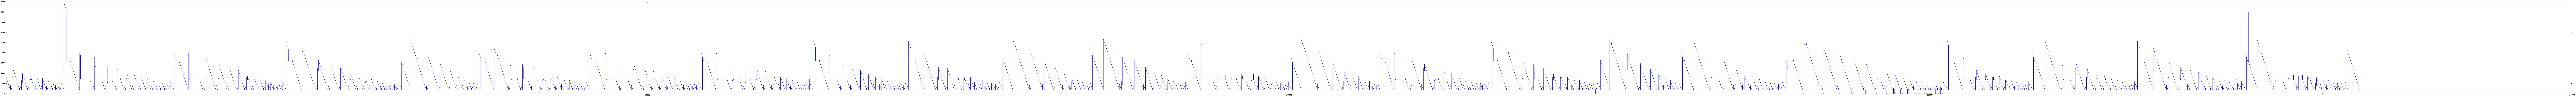

In [75]:
rcParams['figure.figsize'] = 280, 10
plt.plot(answer)    #тест2

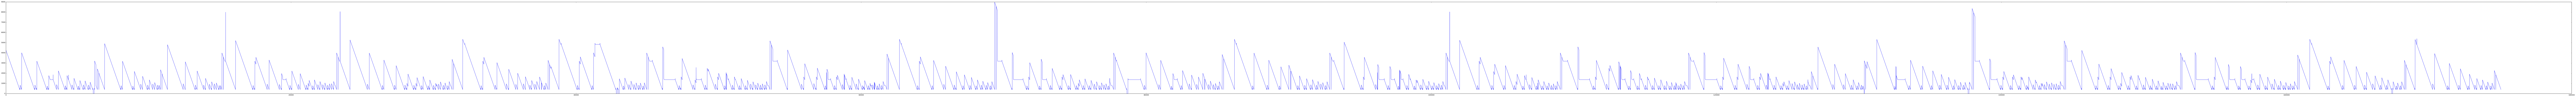

In [73]:
rcParams['figure.figsize'] = 280, 10
plt.plot(answer)   #тест0

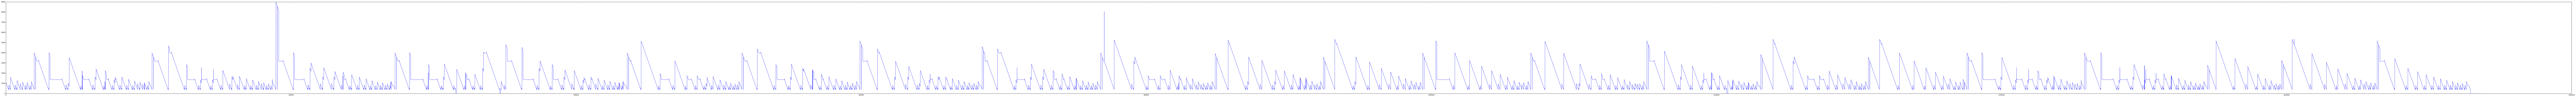

In [69]:
rcParams['figure.figsize'] = 280, 10
plt.plot(answer)   #тест1